## Visual Demonstration of CNNs

In [1]:
# Import necessary libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model

from matplotlib import cm
import helper
from helper import cnn_model, get_cifar10, plot_featuremaps

In [2]:
# As we are using a pre-trained model, 
# we will only use 1000 images from the 'unseen' test data 
# The get_cifar10() function will load 1000 cifar10 images
(x_test, y_test) = get_cifar10()

# We also provide a handy dictionary to map response values to image labels
cifar10dict = helper.cifar10dict
cifar10dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

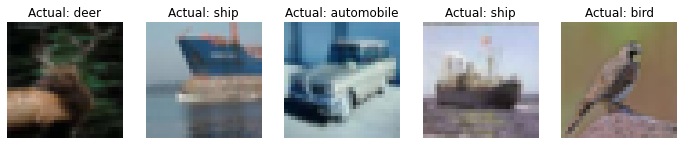

In [3]:
# Let's look at some sample images with their labels
# Run the helper code below to plot the image and its label
num_images = 5
fig, ax = plt.subplots(1,num_images,figsize=(12,12))
for i in range(num_images):
    image_index = random.randint(0,1000)
    img = (x_test[image_index] + 0.5)
    ax[i].imshow(img)
    label = cifar10dict[np.argmax(y_test[image_index])]
    ax[i].set_title(f'Actual: {label}')
    ax[i].axis('off')

In [4]:
# For this exercise we use a pre-trained network by calling
# the cnn_model() function
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

2022-06-02 00:04:49.361492: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-02 00:04:49.361802: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/usr/lib/python3.10/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
# Evaluate the pretrained model on the test set
model_score = model.evaluate(x_test,y_test)
print(f'The test set accuracy for the pre-trained model is {100*model_score[1]:.2f} %')

32/32 [==============================] - 1s 9ms/step - loss: 0.6972 - accuracy: 0.7660
The test set accuracy for the pre-trained model is 76.60 %


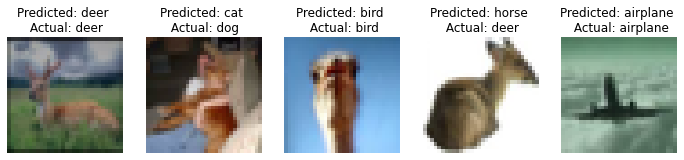

In [9]:
# Visualizing the predictions on 5 randomly selected images
num_images = 5
fig, ax = plt.subplots(1,num_images,figsize=(12,12))
for i in range(num_images):
    image_index = random.randint(0,1000)
    prediction= cifar10dict[int(np.squeeze(np.argmax(model.predict(x_test[image_index:image_index+1]),axis=1),axis=0))]
    img = (x_test[image_index] + 0.5)
    ax[i].imshow(img)
    ax[i].set_title(f'Predicted: {prediction} \n Actual: {cifar10dict[np.argmax(y_test[image_index:image_index+1])]}')
    ax[i].axis('off')

## Visualize kernels corresponding to the filters for the 1st layer


In [15]:
model.input

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv2d_input')>

In [13]:
# The 'weights' variable is of the form 
# [height, width, channel, number of filters]

# Use .get_weights() with the appropriate layer number 
# to get the weights and bias of the first layer i.e. layer number 0
weights, bias= model.layers[0].get_weights()

assert weights.shape == (3,3,3,32), "Computed weights are incorrect"

In [17]:
weights.shape

(3, 3, 3, 32)

In [19]:
# How many filters are in the first convolution layer?
n_filters = weights.shape[3]
print(f'Number of filters: {n_filters}')

# Print the filter size
filter_channel = weights.shape[2]
filter_height = weights.shape[0]
filter_width = weights.shape[1]
print(f'Number of channels {filter_channel}')
print(f'Filter height {filter_height}')
print(f'Filter width {filter_width}')


Number of filters: 32
Number of channels 3
Filter height 3
Filter width 3


### ⏸ Based on the dimensions of the input image given to the defined model, how many kernels constitute the first filter?


#### A. $3$
#### B. $32$
#### C. $1$
#### D. $24$

In [20]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = 'A'

In [21]:
# The 'weights' variable (defined above) is of the form 
# [height, width, channel, number of filters]
# From this select all three channels, the entire length and width
# and the first filter
kernels_filter1 = weights[:,:,:,0]

# Test case to check if you have indexed correctly
assert kernels_filter1.shape == (3,3,3)

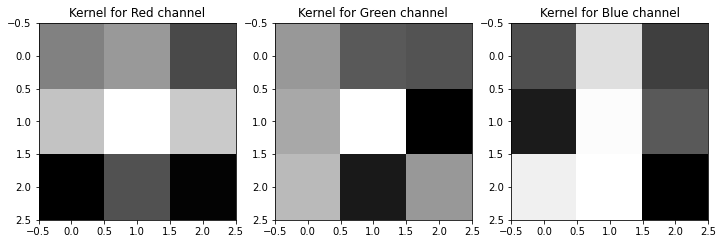

In [22]:
# Use the helper code below to plot each kernel of the choosen filter 
fig, axes = plt.subplots(1,3,figsize = (12,4))
colors = ['Red','Green','Blue']
for num, i in enumerate(axes):
  i.imshow(kernels_filter1[num],cmap='gray')
  i.set_title(f'Kernel for {colors[num]} channel')
  

## Visualizing one *filter* for the first convolutional layer

Each of the above *kernels* stacked together forms a filter, which interacts with the input.

Text(0.5, 1.0, '1st Filter of convolution')

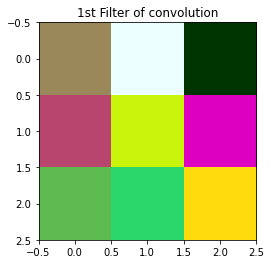

In [23]:
# For the same filter above, we perform normalization because the current
# values are between -1 and 1 and the imshow function would truncate all values 
# less than 0 making the visual difficult to infer from.
kernels_filter1 = (kernels_filter1 - kernels_filter1.min(axis=(0,1)))/(kernels_filter1.max(axis=(0,1)) - kernels_filter1.min(axis=(0,1)))

# Plotting the filter
fig, ax = plt.subplots(1,1,figsize = (4,4))
ax.imshow(kernels_filter1)
ax.set_title(f'1st Filter of convolution')

## Visualizing all the filters (32) for the first convolutional layer

Text(0.5, 0.53, 'All 32 filters for 1st convolution layer')

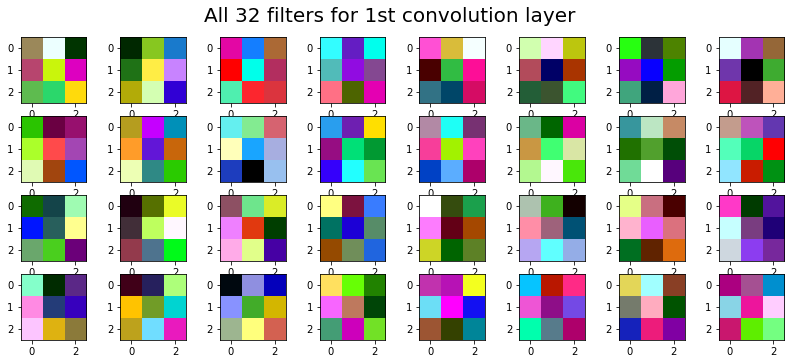

In [24]:
# Use the helper code below to visualize all filters for the first layer

fig,ax=plt.subplots(4,8,figsize=(14,14))
fig.subplots_adjust(bottom=0.2,top=0.5)
for i in range(4):
    for j in range(8):
        filters= weights[:,:,:,(8*i)+j]
        filters = (filters - filters.min(axis=(0,1)))/(filters.max(axis=(0,1)) - filters.min(axis=(0,1)))
        ax[i,j].imshow(filters)
        
fig.suptitle('All 32 filters for 1st convolution layer',fontsize=20, y=0.53);     

## Visualize Feature Maps & Activations


### ⏸ Which of the following statements is true?


#### A. Feature maps are a collection of weights, and filters are outputs of convolved inputs. 
#### B. Filters are a collection of learned weights, and feature maps are outputs of convolved inputs.
#### C. Feature maps are learned features of a trained CNN modela
#### D. Filters are the outputs of an activation layer on a feature map.

In [25]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer2 = 'B'

In [26]:
# Use model.layers to get a list of all the layers in the model
layers_list = model.layers
print('\n'.join([layer.name for layer in layers_list]))

conv2d
activation
conv2d_1
activation_1
max_pooling2d
conv2d_2
activation_2
conv2d_3
activation_3
max_pooling2d_1
flatten
dense
activation_4
dense_1
activation_5


For this exercise, we take a look at only the first convolution layer and the first activation layer.

In [27]:
# Get the output of the first convolution layer
layer0_output = model.layers[0].output


In [28]:
# Use the tf.keras functional API : Model(inputs= , outputs = ) where
# the input will come from model.input and output will be layer0_output
activation_model = tf.keras.Model(inputs=model.input,outputs=layer0_output)

# Use a sample image from the test set to visualize the feature maps
img = x_test[16].reshape(1,32,32,3)

# NOTE: We have to reshape the image to 4-d tensor so that
# it can input to the trained model

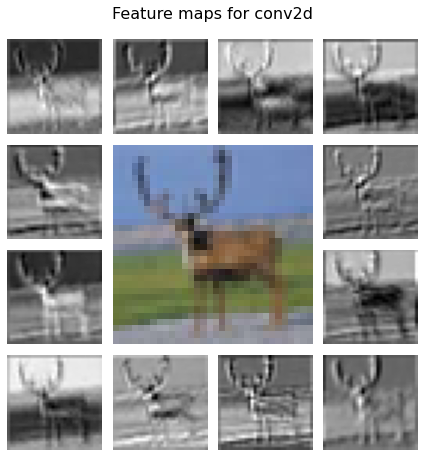

In [29]:
# Use the helper code below to plot the feature maps
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model.layers[0].name])

# Visualizing the first activation

In [30]:
# Get the output of the first convolution layer
layer1_output = model.layers[1].output

In [31]:
# Follow the same steps as above for the next layer
activation_model = tf.keras.Model(inputs=model.input,outputs=layer1_output)


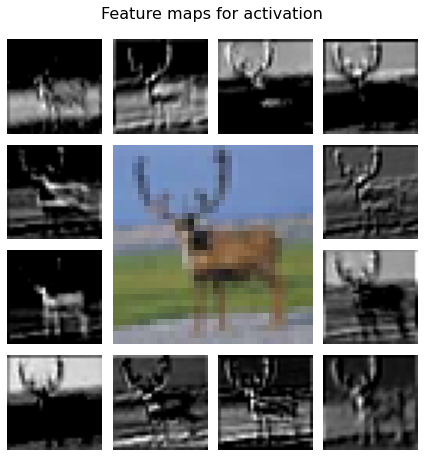

In [32]:
# Use the helper code to again visualize the outputs
img = x_test[16].reshape(1,32,32,3)
activations = activation_model.predict(img)

# You can download the plot_featuremaps helper file
# to see how exactly do we make this nice plot below
plot_featuremaps(img,activations,[model.layers[1].name])

### ⏸ Using the feature maps, is it possible to locate the part of the image that is most responsible for predicting the output class?
#### A. Yes
#### B. No

In [0]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below 
# (eg. if you choose option B, put 'B')
answer3 = 'B'